<a href="https://colab.research.google.com/github/sunil7800972906/Horse-or-Human-Classification-using-CNN/blob/main/human_or_horse_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Horse or Human Classification using CNN
# We have data for training:
500 horse images 527 human(male & female) images
# For validation:
122 horse images 123 human(male & female) images
#Problem Statement.
Classifie given image is horse or human(male/female)
# Solution:
To solve this problem we are going to use Deep learning Algorithm that is CNN(Convolutional Neural Network).


# **Data Source**

Raw Data Source:https://www.kaggle.com/sanikamal/horses-or-humans-datas

## **Load Libraries**

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
keras.__version__

'2.4.3'

# Load Data

In [ ]:
train_data_path = "/content/drive/MyDrive/horse-or-human/train"
validation_data_path = "/content/drive/MyDrive/horse-or-human/validation"

## **Data Preprocessing**

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150, 150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                     target_size=(150, 150),
                                     batch_size=32,
                                     class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

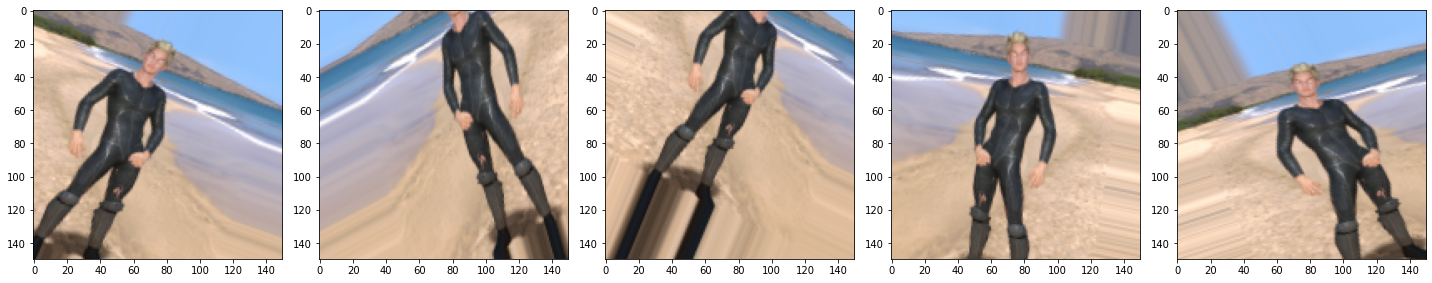

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

## **Building CNN Model**

In [ ]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=128, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),#neural network beulding
                                     keras.layers.Dense(units=128,activation='relu'), #input layers
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax') #output layer
])       


## **Compile cnn model**

In [ ]:
cnn_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

In [ ]:
#train cnn model
history = cnn_model.fit(training_data,
                        epochs=100,
                        verbose=1,
                        validation_data = valid_data,
                        callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - 985s 30s/step - loss: 0.6945 - accuracy: 0.5493 - val_loss: 0.6933 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
Epoch 2/100
33/33 [==============================] - 58s 2s/step - loss: 0.6441 - accuracy: 0.6298 - val_loss: 0.6576 - val_accuracy: 0.5859

Epoch 00002: val_accuracy improved from 0.50000 to 0.58594, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
Epoch 3/100
33/33 [==============================] - 58s 2s/step - loss: 0.5738 - accuracy: 0.7183 - val_loss: 0.9960 - val_accuracy: 0.5547

Epoch 00003: val_accuracy did not improve from 0.58594
Epoch 4/100
33/33 [==============================] - 58s 2s/step - loss: 0.5035 - accuracy: 0.7641 - val_loss: 1.1349 - val_accuracy: 0.6094

Epoch 00004: val_accuracy improved from 0.58594 to 0.60938, saving model to /content/drive/MyD

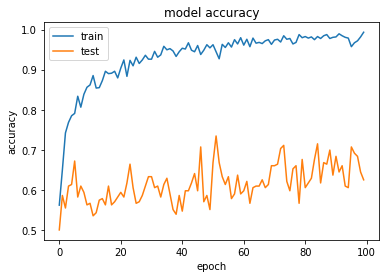

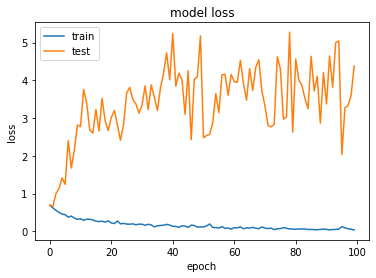

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Predict Horse or Human**

Here we are loading train CNN model to predict Given input(image)is Horse or Human

## **Import Libraries**

In [ ]:
# Load Libraries
import numpy as np
import keras
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
model_path = "/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5"
model = keras.models.load_model(model_path)

In [ ]:
#horse image path
h1 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-0.png'
h2 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-1.png'
h3 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-2.png'
h4 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-3.png'
h5 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-4.png'
h6 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-5.png'
h7 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-6.png'
h8 = '/content/drive/MyDrive/horse-or-human/test_data/train/horses/horse01-7.png'

#human image path
hu1 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-00.png'
hu2 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-01.png'
hu3 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-02.png'
hu4 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-03.png'
hu5 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-04.png'
hu6 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-05.png'
hu7 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-06.png'
hu8 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-07.png'
hu9 = '/content/drive/MyDrive/horse-or-human/test_data/train/humans/human01-08.png'


In [ ]:
from keras_preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150,150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>",pred)
  
  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')


In [ ]:
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6,hu7,hu8,hu9]:
  pred_human_horse(model, horse_or_human)

[[0.996 0.004]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.999 0.001]] --->>> 0
Predicted>>> Horse
[[0.996 0.004]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.028 0.972]] --->>> 1
Predicted>>> Human
[[0.024 0.976]] --->>> 1
Predicted>>> Human
[[0.02 0.98]] --->>> 1
Predicted>>> Human
[[0.023 0.977]] --->>> 1
Predicted>>> Human
[[0.017 0.983]] --->>> 1
Predicted>>> Human
[[0.023 0.977]] --->>> 1
Predicted>>> Human
[[0.032 0.968]] --->>> 1
Predicted>>> Human
[[0.021 0.979]] --->>> 1
Predicted>>> Human
[[0.054 0.946]] --->>> 1
Predicted>>> Human
